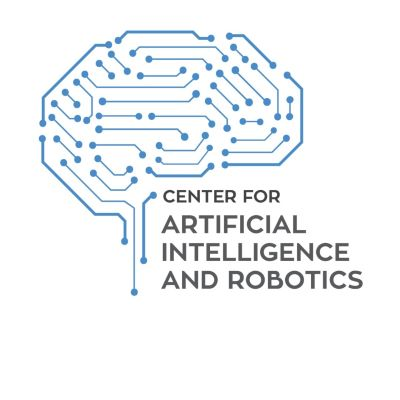

# Decision Trees and Random Forests Project

<div style="font-size:16px;">
The dataset belongs to a financial institution, and our goal is to predict whether a customer will repay a loan if it is granted to them or not.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data

<div style="font-size:16px;">
    Load the desired dataset, take a quick look at it, and display its general and statistical information

In [2]:
df = pd.read_csv('loan_data.csv')

In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


---

* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

---

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [32]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [16]:
df.groupby('delinq.2yrs')['credit.policy']

In [19]:
df[df['delinq.2yrs'] == 13].shape[0]

1

In [26]:
unique_deling = df['delinq.2yrs'].unique()
unique_deling.sort()
unique_deling

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 11, 13], dtype=int64)

In [33]:
df.isnull().mean()

credit.policy        0.0
purpose              0.0
int.rate             0.0
installment          0.0
log.annual.inc       0.0
dti                  0.0
fico                 0.0
days.with.cr.line    0.0
revol.bal            0.0
revol.util           0.0
inq.last.6mths       0.0
delinq.2yrs          0.0
pub.rec              0.0
not.fully.paid       0.0
dtype: float64

## Exploratory Data Analysis (EDA)

<div style="font-size:16px;">
    Now, let's explore the dataset a bit (exploratory analysis) to see what information we can uncover.

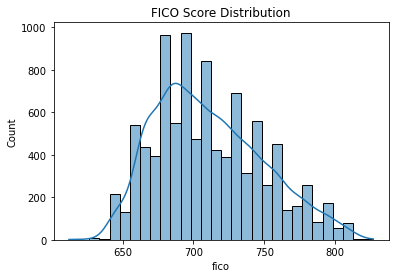

In [34]:
sns.histplot(df['fico'], bins=30, kde=True)
plt.title("FICO Score Distribution")
plt.show()

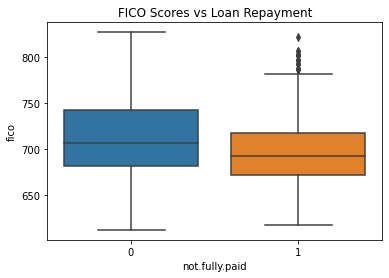

In [35]:
sns.boxplot(x='not.fully.paid', y='fico', data=df)
plt.title("FICO Scores vs Loan Repayment")
plt.show()

---

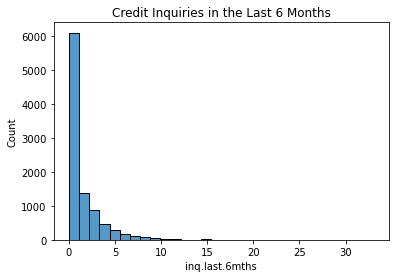

In [7]:
sns.histplot(df['inq.last.6mths'], bins=30, kde=False)
plt.title("Credit Inquiries in the Last 6 Months")
plt.show()

## Correlation Matrix

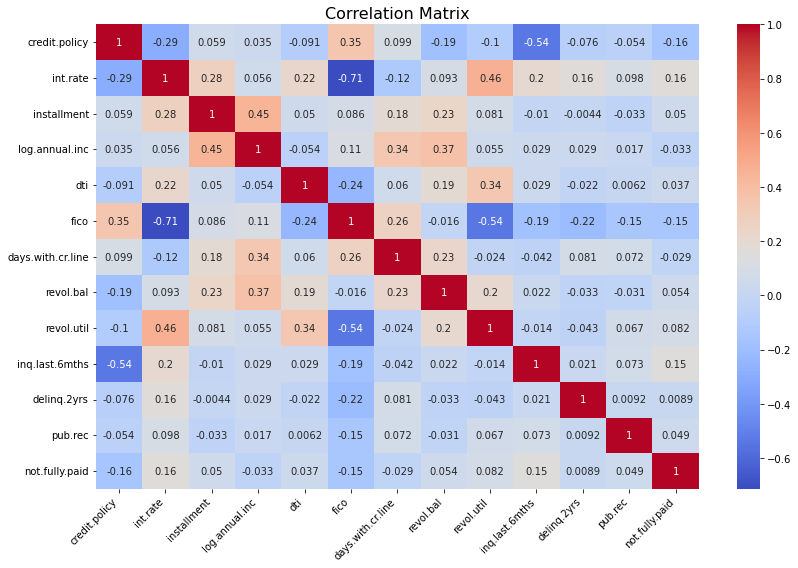

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels and adjust font size
plt.yticks(fontsize=10)  # Adjust y-axis label font size
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

<div style="font-size:16px;">
    Plot the histogram of the fico feature, separated by credit.policy, as overlapping charts.

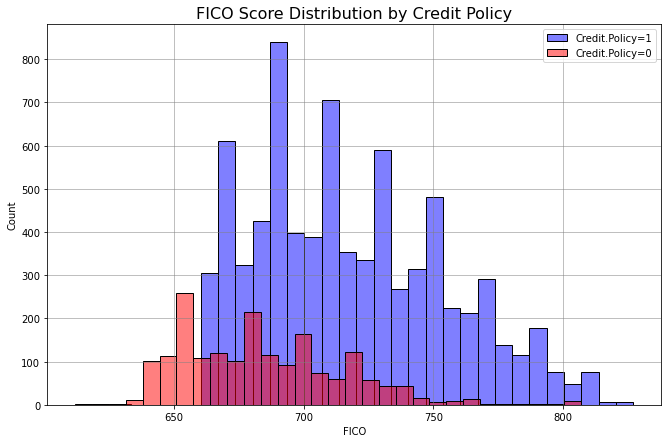

In [56]:
plt.figure(figsize=(11, 7))

# Plot histogram for borrowers who meet the credit policy (credit.policy = 1)
sns.histplot(df[df['credit.policy'] == 1]['fico'], 
             bins=30, color='blue', label='Credit.Policy=1', alpha=0.5)

# Plot histogram for borrowers who do not meet the credit policy (credit.policy = 0)
sns.histplot(df[df['credit.policy'] == 0]['fico'], 
             bins=30, color='red', label='Credit.Policy=0', alpha=0.5)

# Add labels and title
plt.xlabel('FICO')
plt.ylabel('Count')
plt.title('FICO Score Distribution by Credit Policy', fontsize=16)

# Display legend to differentiate the groups
plt.legend()

plt.grid(True, linewidth = 0.5, color='gray')

# Show the plot
plt.show()

<hr style="height:1px;border-width:0;color:black;background-color:black">

<div style="font-size:16px;">
Plot the same histogram as above, but this time separated by the label, which is not.fully.paid.

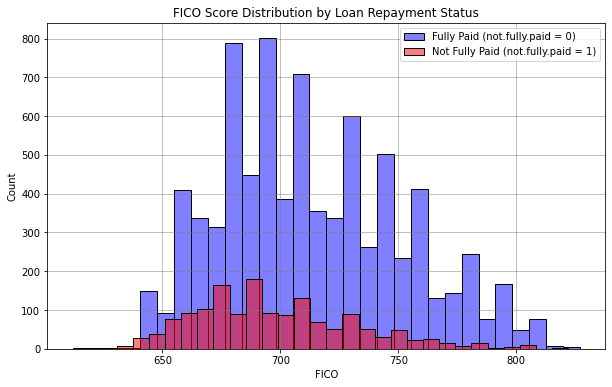

In [58]:
plt.figure(figsize=(10, 6))

# Plot histogram for borrowers who fully repaid the loan (not.fully.paid = 0)
sns.histplot(df[df['not.fully.paid'] == 0]['fico'], 
             bins=30, color='blue', label='Fully Paid (not.fully.paid = 0)', alpha=0.5)

# Plot histogram for borrowers who did not fully repay the loan (not.fully.paid = 1)
sns.histplot(df[df['not.fully.paid'] == 1]['fico'], 
             bins=30, color='red', label='Not Fully Paid (not.fully.paid = 1)', alpha=0.5)

# Add labels and title
plt.xlabel('FICO')
plt.ylabel('Count')
plt.title('FICO Score Distribution by Loan Repayment Status')

# Add grid to the plot
plt.grid(True, linewidth=0.5, color='gray')

# Display legend to differentiate the groups
plt.legend()

# Show the plot
plt.show()

<hr style="height:1px;border-width:0;color:black;background-color:black">

<div style="font-size:16px;">
Plot a countplot for the purpose feature, separated by whether customers successfully repaid the loan or not.

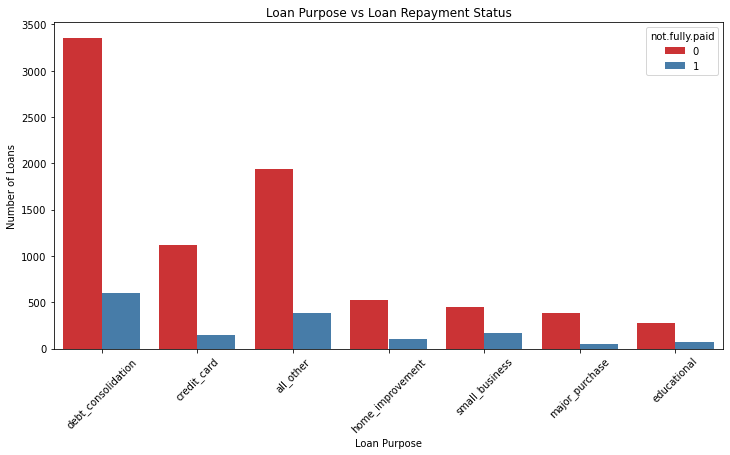

In [64]:
plt.figure(figsize=(12, 6))

# Create a countplot for the 'purpose' feature with hue based on 'not.fully.paid'
sns.countplot(x='purpose', hue='not.fully.paid', data=df, palette='Set1')

# Add labels and title
plt.xlabel('Loan Purpose')
plt.ylabel('Number of Loans')
plt.title('Loan Purpose vs Loan Repayment Status')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()

<hr style="height:1px;border-width:0;color:black;background-color:black">

<div style="font-size:16px;">
Plot a jointplot based on the two features fico and int.rate.

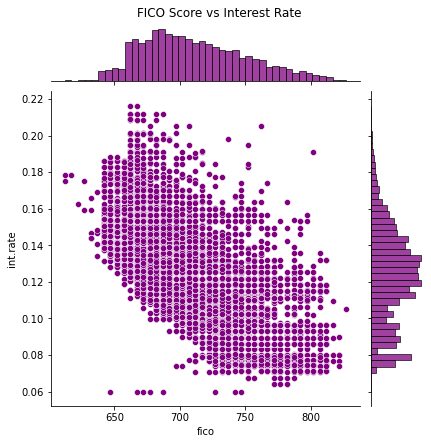

In [65]:
sns.jointplot(x='fico', y='int.rate', data=df, kind='scatter', color='purple')

# Add a title to the jointplot
plt.suptitle('FICO Score vs Interest Rate', y=1.02)  # Adjust y to move the title above the plot

# Show the plot
plt.show()

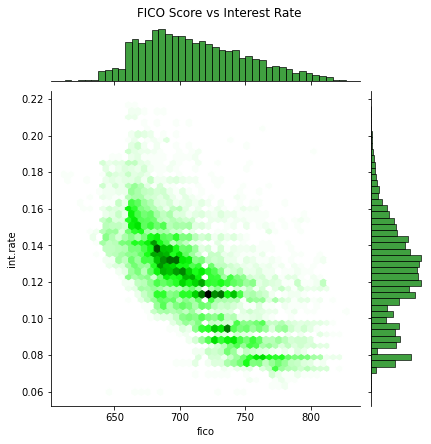

In [66]:
sns.jointplot(x='fico', y='int.rate', data=df, kind='hex', color='green')

# Add a title to the jointplot
plt.suptitle('FICO Score vs Interest Rate', y=1.02)  # Adjust y to move the title above the plot

# Show the plot
plt.show()

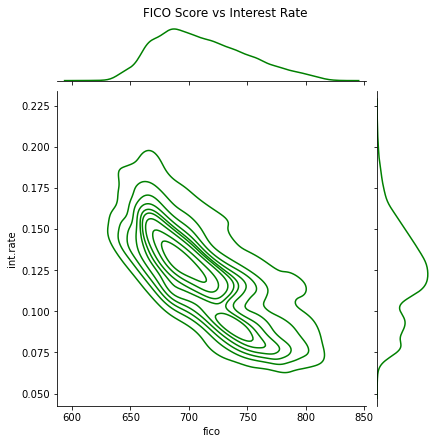

In [67]:
sns.jointplot(x='fico', y='int.rate', data=df, kind='kde', color='green')

# Add a title to the jointplot
plt.suptitle('FICO Score vs Interest Rate', y=1.02)  # Adjust y to move the title above the plot

# Show the plot
plt.show()

<hr style="height:1px;border-width:0;color:black;background-color:black">

<div style="font-size:16px;">
    It seems we've discovered a correlation. To analyze these correlations more closely, plot an lmplot based on fico, with two separate columns indicating whether the loan was repaid or not, and differentiate by credit.policy.

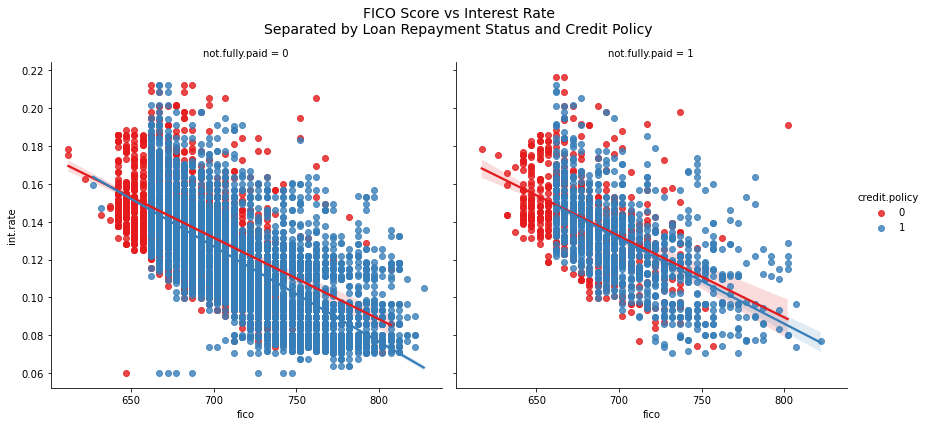

In [4]:
sns.lmplot(x='fico', y='int.rate', data=df, 
           col='not.fully.paid', hue='credit.policy', 
           palette='Set1', height=6, aspect=1)

# Add a title to the plot
plt.subplots_adjust(top=0.85)
plt.suptitle('FICO Score vs Interest Rate\nSeparated by Loan Repayment Status and Credit Policy', fontsize=14)

# Show the plot
plt.show()

### **Conclusions from Visualizations**

1. **FICO Score and Interest Rate Relationship:**
   - There is a **strong negative correlation** between **FICO scores** and **interest rates**. Borrowers with **higher FICO scores** are consistently offered **lower interest rates**, reflecting their **lower credit risk**.

2. **Impact of Credit Policy:**
   - Borrowers who **meet the credit policy criteria** (`credit.policy = 1`) generally receive **lower interest rates** compared to those who don’t (`credit.policy = 0`), even when they have similar FICO scores.
   - However, **meeting the credit policy doesn’t guarantee loan repayment**. A significant number of borrowers who met the credit criteria still **defaulted** on their loans.

3. **Loan Repayment Patterns:**
   - The **default rate** is higher among borrowers who **did not meet the credit policy** (`credit.policy = 0`), as seen by the concentration of **red dots** in the default (`not.fully.paid = 1`) plot.
   - **Defaulters** tend to have **lower FICO scores** and are often charged **higher interest rates**. This suggests that while **FICO scores and credit policies** help manage risk, they are **not sufficient** on their own to prevent defaults.

4. **Insights for Credit Risk Modeling:**
   - While **FICO scores** and **credit policies** are strong predictors, additional factors like **debt-to-income ratio (`dti`)**, **recent credit inquiries (`inq.last.6mths`)**, and **public records (`pub.rec`)** should be included to build a **more accurate credit risk model**.

5. **Real-World Implications:**
   - Lenders apply **higher interest rates** to **riskier borrowers** as a way to **compensate for potential defaults**. However, this strategy doesn’t eliminate the risk entirely, as shown by the defaults among even **creditworthy borrowers**.


<hr style="height:1px;border-width:0;color:black;background-color:black">

# Setting up the Data

## Categorical Features

<div style="font-size:16px;">
    Converting the categorical features to numerical.

### One-Hot Encoding

In [5]:
df_encoded = pd.get_dummies(df, columns=['purpose'], drop_first=True)

In [7]:
df_encoded.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## Train Test Split


<div style="font-size:16px;">
    Spliting our data into training and testing sets.

In [8]:
from sklearn.model_selection import train_test_split

In [10]:
X = df_encoded.drop(['not.fully.paid'], axis=1)
y = df_encoded['not.fully.paid']

In [11]:
df_encoded.shape

(9578, 19)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)

In [13]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (7662, 18)
X_test shape: (1916, 18)
y_train shape: (7662,)
y_test shape: (1916,)


## Training a Decision Tree Model

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [15]:
dtree = DecisionTreeClassifier(random_state=42)

In [16]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Predictions and Evaluation of Decision Tree

In [28]:
y_tree_pred = dtree.predict(X_test)

In [29]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")


Accuracy: 0.7281


In [22]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[1332  279]
 [ 242   63]]


In [21]:
# Classification Report (Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1611
           1       0.18      0.21      0.19       305

    accuracy                           0.73      1916
   macro avg       0.52      0.52      0.52      1916
weighted avg       0.74      0.73      0.73      1916



## Visualizing the Decision Tree

In [24]:
from sklearn import tree

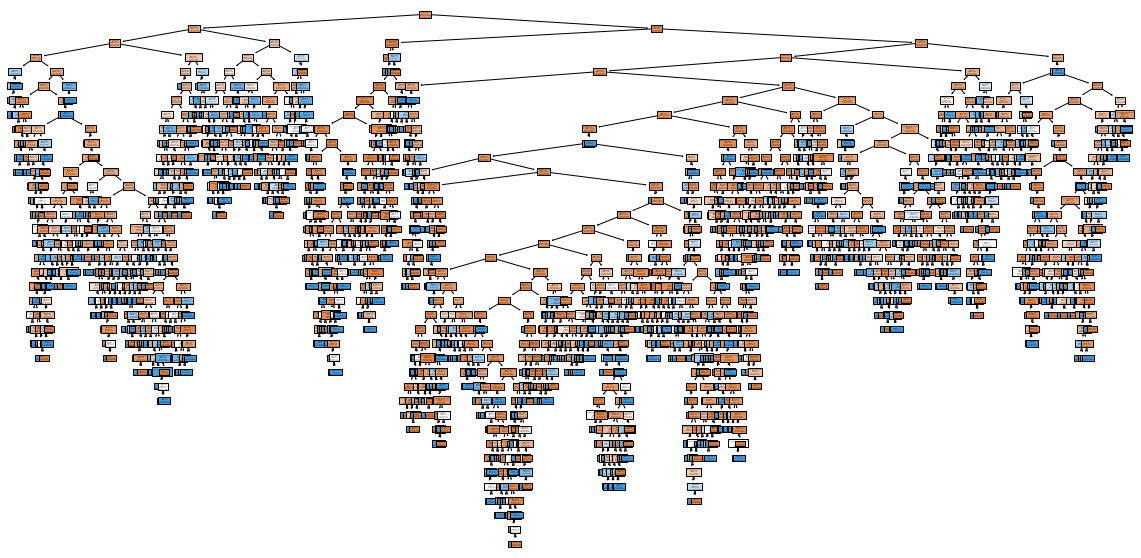

In [25]:
plt.figure(figsize=(20,10))

# Plot the tree
tree.plot_tree(dtree, feature_names=X.columns, class_names=['Fully Paid', 'Not Fully Paid'], filled=True)

# Show the plot
plt.show()

In [30]:
y_test_df = pd.DataFrame(y_test).reset_index(drop=True)
y_tree_pred_df = pd.DataFrame(y_tree_pred, columns=['Predictions']).reset_index(drop=True)

In [34]:
comparison_tree_df = pd.concat([y_test_df, y_tree_pred_df], axis=1)
comparison_tree_df.columns = ['Label', 'Predictions']

In [35]:
comparison_tree_df

,Label,Predictions
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
1911,1,0
1912,0,0
1913,0,0
1914,0,0


## Training the Random Forest model

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Predictions and Evaluation of Random Forest

In [38]:
rf_predictions = rf_model.predict(X_test)

In [41]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"\nRandom Forest Accuracy: {rf_accuracy:.4f}")


Random Forest Accuracy: 0.8413


In [40]:
print("\nClassification Report:")
print(classification_report(y_test, rf_predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       0.53      0.03      0.05       305

    accuracy                           0.84      1916
   macro avg       0.69      0.51      0.48      1916
weighted avg       0.79      0.84      0.78      1916



In [39]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

Confusion Matrix:
[[1604    7]
 [ 297    8]]


<div style="font-size:16px;">
    Using the rfc.feature_importances_ attribute, display the most important features involved in this prediction.

In [43]:
importances = rf_model.feature_importances_

In [44]:
feature_importance_df = pd.DataFrame({
    'feat': X.columns,
    'value': importances * 100  # Multiply by 100 to express as percentages
})

In [46]:
feature_importance_df = feature_importance_df.sort_values(by='value', ascending=False).reset_index(drop=True)

In [47]:
feature_importance_df

,feat,value
0,installment,11.603895
1,days.with.cr.line,11.478317
2,revol.util,11.218351
3,revol.bal,11.207376
4,log.annual.inc,11.037607
5,dti,11.029191
6,int.rate,10.255496
7,fico,7.873044
8,inq.last.6mths,5.387556
9,purpose_debt_consolidation,1.553416
